In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

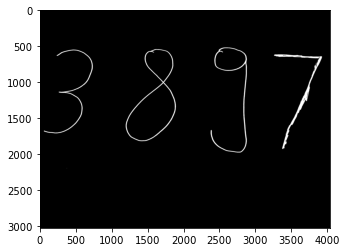

In [16]:
# creating a black white image of the given handwritten-number (picture)

img=cv2.imread('hand_writing_recognition/pictures/numbers3897.png')
# img_bgr=img.copy()
# img_bgr=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray=img.copy()
img_gray=cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
retval, dst= cv2.threshold(img_gray, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(dst, cmap='gray')





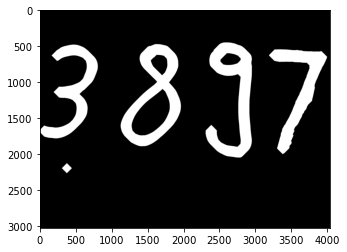

In [17]:
# applying dilation and erosion to get the handwritten number blurred and more in type of MNIST, becasuse the model was trained on mnist pictures
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS, (15,15))
dst=cv2.dilate(dst, kernel, iterations=15)
dst=cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
dst=cv2.erode(dst, kernel, iterations=5)
# dst=cv2.resize(dst, (28,28))
filename='output.png'
cv2.imwrite(filename, dst)
plt.imshow(dst, cmap='gray')

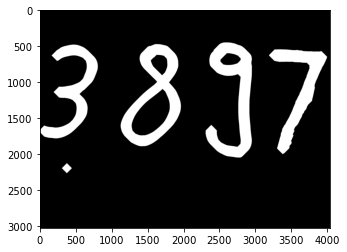

In [18]:
plt.imshow(dst, cmap='gray')

In [19]:
contours, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [20]:
print(contours)

[array([[[ 372, 2123]],

       [[ 372, 2124]],

       [[ 372, 2125]],

       ...,

       [[ 375, 2123]],

       [[ 374, 2123]],

       [[ 373, 2123]]], dtype=int32), array([[[3265,  546]],

       [[3264,  547]],

       [[3263,  547]],

       ...,

       [[3268,  546]],

       [[3267,  546]],

       [[3266,  546]]], dtype=int32), array([[[454, 480]],

       [[453, 481]],

       [[452, 481]],

       ...,

       [[457, 480]],

       [[456, 480]],

       [[455, 480]]], dtype=int32), array([[[1607,  473]],

       [[1606,  474]],

       [[1605,  474]],

       ...,

       [[1610,  473]],

       [[1609,  473]],

       [[1608,  473]]], dtype=int32), array([[[2565,  450]],

       [[2564,  451]],

       [[2563,  451]],

       ...,

       [[2568,  450]],

       [[2567,  450]],

       [[2566,  450]]], dtype=int32)]


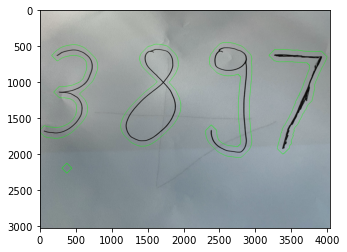

In [31]:
copy = img.copy()
# plt.imshow(copy)
cv2.drawContours(copy, contours, -1,(0,255,0), 4)
plt.imshow(copy)

In [32]:
sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)


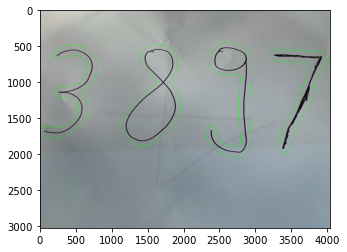

In [43]:
copy = img.copy()
# plt.imshow(copy)
cv2.drawContours(copy, sorted_contours[0:4], -1,(0,255,0), 4)
plt.imshow(copy)